<center><h1 > Adidas US Sales - Capstone Project </h1>


<center><h2>By: Brian Kim</h2>


<center><img src = "https://upload.wikimedia.org/wikipedia/commons/2/20/Adidas_Logo.svg" width="800" height="600" class='center'>}








<h1></h1>


<center><h2 style="color: Blue"> Data Importing </h2>



<h1></h1>


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

adidas = pd.read_csv('Desktop/Capstone 2/Adidas_US_Sales.csv')
adidas.info()
adidas.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store





<h1></h1>


<center><h2 style = 'color : blue'> Goals </h2></center>

<left><body>

Utilizing the Sales data of Adidas from the Years 2020 to 2021, I hope to answer the overarching question of:

<b>How can Adidas prevent the loss of future market share through the identification of at least one divestment product category in at least one region and predict our highest performing products for the next 6 months?
</b>

The following list contains the steps/outcomes I hope to discover when analyzing the data found in "<b>Adidas_US_Sales.csv</b>".



<ol>
  <li>Product Category Performance:
     <ul>
      <li>Sales Trends per Category</li>
      <li>Margin Trends per Category</li>
    </ul>
    </li>
  <li>Regional Performance:
    <ul>
      <li>Regional Sales Performance</li>
      <li>City Profitability</li>
    </ul>
  </li>
  <li>Distribution Performancee
     <ul>
      <li>Retailer Sales</li>
      <li>Sales Method (Online, In-Store, Outlet)</li>
     </ul>   </li>
</ol

>
</body>


<h1></h1>




<h1></h1>


<center><h2 style="color: Blue"> Data Cleansing </h2>


In [8]:
#check null values
adidas.isnull().sum()



Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [9]:
adidas.shape

(9648, 13)

Changing data type from String to Floats

In [11]:
#removing any special characters from columns
adidas['Units Sold'] = adidas['Units Sold'].str.replace(',', '')
adidas['Price per Unit'] = adidas['Price per Unit'].str.lstrip('$').str.strip()
adidas['Operating Margin'] = adidas['Operating Margin'].str.rstrip('%')

#changing invoice date from a string to a datetime
adidas['Invoice Date'] = pd.to_datetime(adidas['Invoice Date'], dayfirst = True)

#changing other columns from string to float/int
adidas['Price per Unit'] = adidas['Price per Unit'].astype(float)
adidas['Units Sold'] = adidas['Units Sold'].astype(int)
adidas['Operating Margin'] = adidas['Operating Margin'].astype(float) * .01


Adding columns 'Month' and 'Year' to dataset 

In [13]:
adidas['Month'] = adidas['Invoice Date'].dt.month
adidas['Year'] = adidas['Invoice Date'].dt.year

Recalculating Total Sales and Operating Profit since these columns were erroneously entered in the dataset


In [15]:
adidas['Total Sales'] = adidas['Units Sold'] * adidas['Price per Unit']
adidas['Operating Profit'] = adidas['Total Sales'] * adidas['Operating Margin']

In [16]:
adidas.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'Month',
       'Year'],
      dtype='object')

In [17]:
adidas.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000.0,30000.0,0.50,In-store,1,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000.0,15000.0,0.30,In-store,1,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000.0,14000.0,0.35,In-store,1,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250.0,13387.5,0.35,In-store,1,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,54000.0,16200.0,0.30,In-store,1,2020


In [18]:
adidas.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int32
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
Month                        int32
Year                         int32
dtype: object

Checking to see if there are 0 values in Units Sold to keep data only containing information on sold units. 

In [20]:
print( 0 in adidas.values)

True


In [21]:
#finding the rows with 0 values for units sold
zero_adidas = adidas[adidas['Units Sold']==0]
print(zero_adidas)

         Retailer  Retailer ID Invoice Date   Region     State   City  \
1019  Foot Locker      1185732   2021-06-05  Midwest  Nebraska  Omaha   
1025  Foot Locker      1185732   2021-06-11  Midwest  Nebraska  Omaha   
4907  Foot Locker      1185732   2021-06-05  Midwest  Nebraska  Omaha   
4913  Foot Locker      1185732   2021-06-11  Midwest  Nebraska  Omaha   

                        Product  Price per Unit  Units Sold  Total Sales  \
1019  Women's Athletic Footwear            35.0           0          0.0   
1025  Women's Athletic Footwear            30.0           0          0.0   
4907  Women's Athletic Footwear            33.0           0          0.0   
4913  Women's Athletic Footwear            27.0           0          0.0   

      Operating Profit  Operating Margin Sales Method  Month  Year  
1019               0.0              0.40       Outlet      6  2021  
1025               0.0              0.40       Outlet      6  2021  
4907               0.0              0.55      

Dropping the 0 units sold rows

In [23]:
adidas = adidas[adidas['Units Sold'] != 0]
print(adidas.shape)

(9644, 15)


<h1></h1>

Data should now be cleaned in that we have done the following:

* Checked for null values
* Changed incorrect data types from strings to floats
* Fixed the Invoice Date column from string to date
* Added Month and Year columns
* Recalculated the Total Sales and Operating Profits 
* Dropped any 0 Units Sold rows


<h1></h1>


<center><h2 style="color: Blue"> Data Analysis </h2>


<h1></h1>


<h3 style="color: Blue"> 1. Product Category Performance </h3>



<h4 style="color: Blue"> 1.1 Sales Trends per Category </h4>

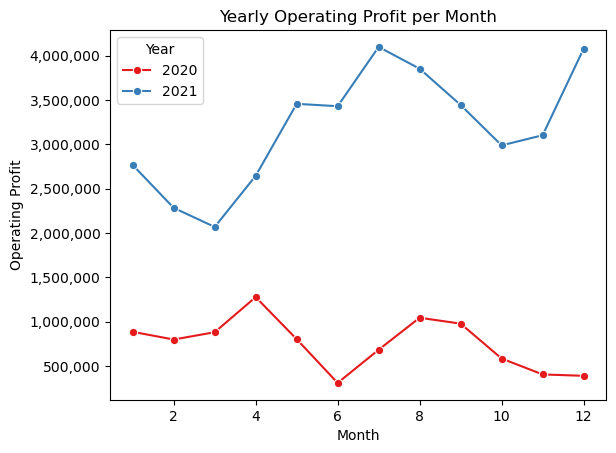

In [28]:
# Importing the matplotlib 'ticker'
import matplotlib.ticker as mtick

sns.lineplot(data=adidas, x='Month', y='Operating Profit', hue='Year', palette = 'Set1',errorbar=None, estimator='sum', marker = 'o').set(title="Yearly Operating Profit per Month")

plt.ticklabel_format(style='plain', axis='y')

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

In [29]:
# Aggregated Operating Profit/Margin by Product Category
operating_profit = adidas.groupby(['Product'])['Operating Profit'].sum().reset_index().sort_values('Operating Profit', ascending=False)
operating_margin = adidas.groupby(['Product'])['Operating Margin'].mean().reset_index().sort_values('Operating Margin', ascending=False)
operating_profit_margin = operating_profit.merge(operating_margin, on='Product')
print(operating_profit_margin)

                     Product  Operating Profit  Operating Margin
0      Men's Street Footwear       11629045.62          0.446130
1            Women's Apparel        9685220.56          0.441318
2    Men's Athletic Footwear        7437456.94          0.402702
3    Women's Street Footwear        6494016.81          0.410199
4              Men's Apparel        6381405.33          0.413225
5  Women's Athletic Footwear        5597822.44          0.424245


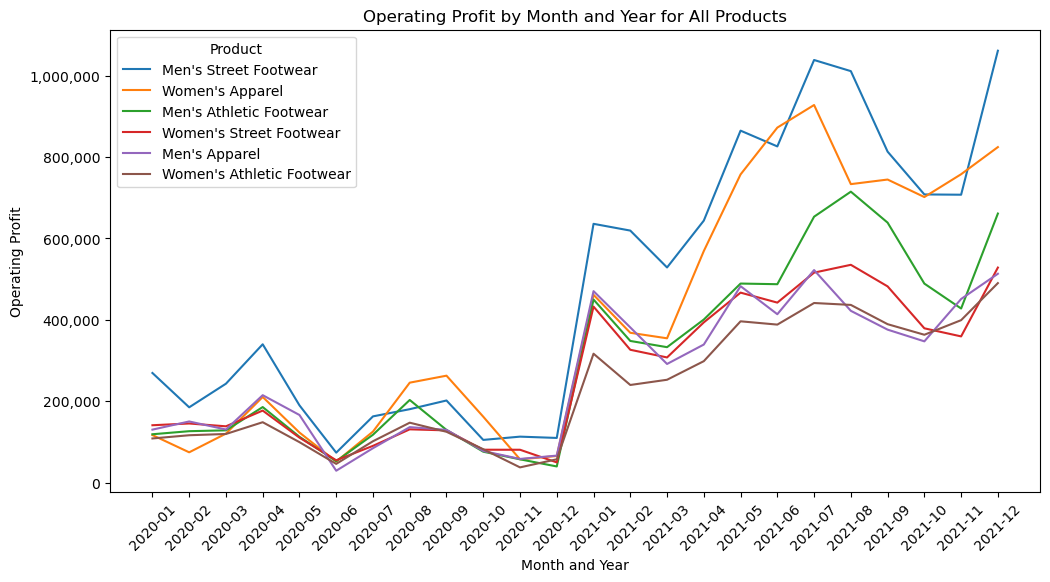

In [344]:
# Creating the Month_Year column from Invoice Date
adidas['Month_Year'] = adidas['Invoice Date'].dt.to_period('M')

# Create group of Products by Month_Year and Operating Profit
grouped_df = adidas.groupby(['Product', 'Month_Year'])['Operating Profit'].sum().reset_index()

# Identifying the products by total Operating Profit
top_products = grouped_df.groupby('Product')['Operating Profit'].sum().nlargest(6).index

# Filter the data for only the top products
top_grouped_df = grouped_df[grouped_df['Product'].isin(top_products)]

# Plot the data
plt.figure(figsize=(12, 6))
for product in top_products:
    product_data = top_grouped_df[top_grouped_df['Product'] == product]
    plt.plot(product_data['Month_Year'].astype(str), product_data['Operating Profit'], label=product)

# Using the new Imported 'Ticker' from matplotlib to display the Y-Axis with true values and commas
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.xlabel('Month and Year')
plt.ylabel('Operating Profit')
plt.title('Operating Profit by Month and Year for All Products')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.show()

<h4 style="color: Blue"> 1.2 Margin Trends per Category </h4>

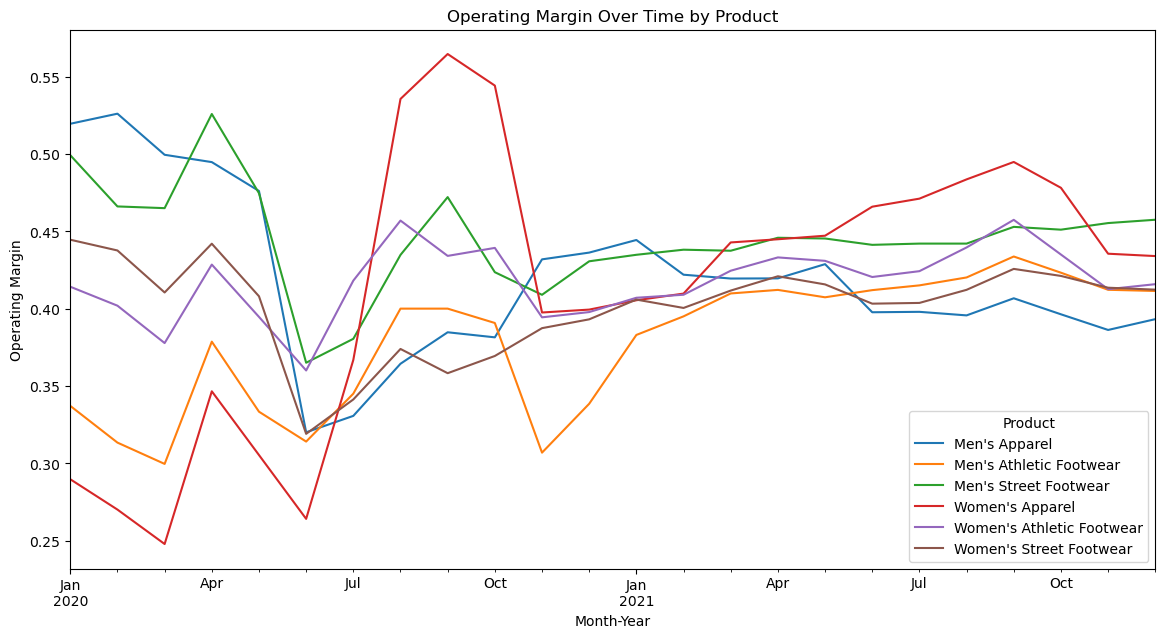

In [32]:
# Creating the products grouped by Operating Margin
margin_df = adidas.groupby(['Month_Year', 'Product']).agg({'Operating Margin': 'mean'}).reset_index()

# Pivot the data so each product is a column
pivot_df = margin_df.pivot(index='Month_Year', columns='Product', values='Operating Margin')

# Plot the Operating Margin for all products
plt.figure(figsize=(14, 7))
pivot_df.plot(kind='line', ax=plt.gca())
plt.title('Operating Margin Over Time by Product')
plt.xlabel('Month-Year')
plt.ylabel('Operating Margin')
plt.legend(title='Product')
plt.show()

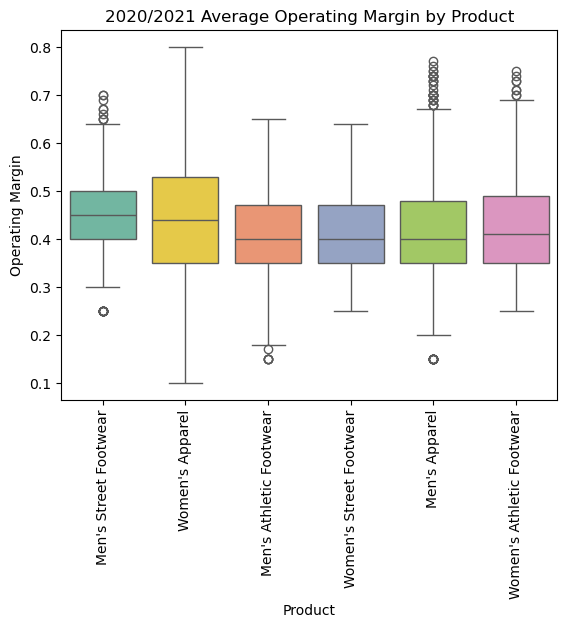

In [33]:
# Creating a Boxplot of the Average Operating Margin by Product 
sns.boxplot(data=adidas, x='Product', y='Operating Margin', hue='Product',palette = 'Set2', order=operating_profit_margin['Product']).set(title='2020/2021 Average Operating Margin by Product')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')

C:\Users\brian\AppData\Local\Temp\ipykernel_11696\2144171200.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months = pd.date_range(start=last_month + pd.DateOffset(months=1), periods=6, freq='M')


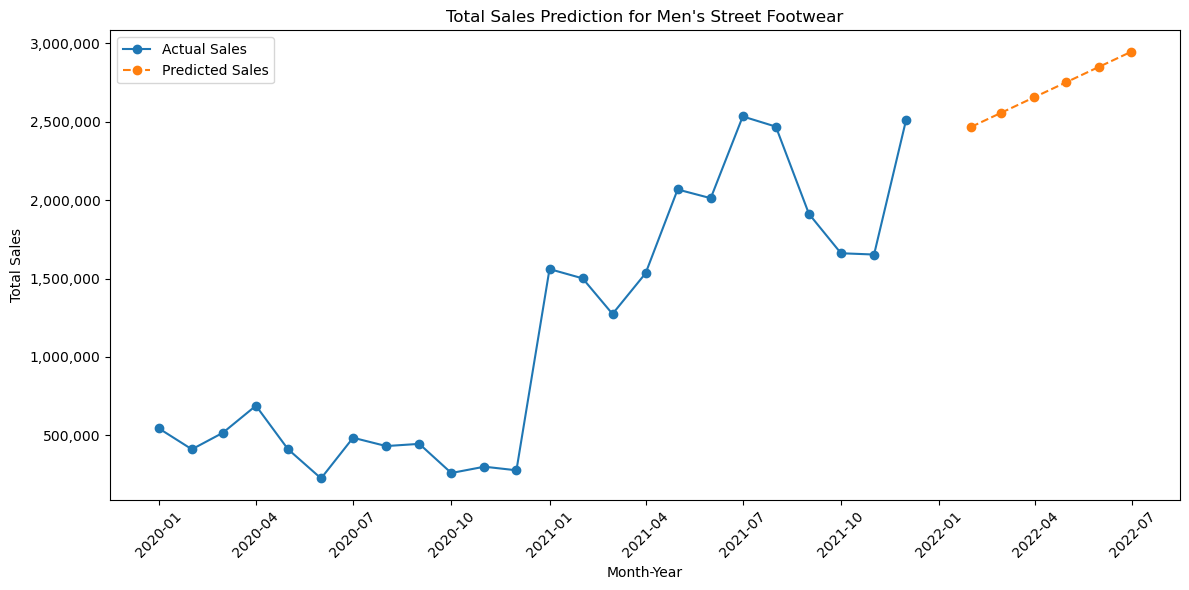

In [346]:
from sklearn.linear_model import LinearRegression

data = adidas

data['Month_Year'] = pd.to_datetime(data['Month_Year'].astype(str), format='%Y-%m')

mens_street_footwear = data[data['Product'] == "Men's Street Footwear"]

# Group by Month_Year and sum total sales
monthly_sales = mens_street_footwear.groupby('Month_Year')['Total Sales'].sum().reset_index()

# Prepare data for regression
monthly_sales['Month_Year'] = monthly_sales['Month_Year'].dt.to_period('M').dt.to_timestamp()
X = np.array((monthly_sales['Month_Year'] - monthly_sales['Month_Year'].min()).dt.days).reshape(-1, 1)
y = monthly_sales['Total Sales'].values

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the next 6 months
last_month = monthly_sales['Month_Year'].max()
future_months = pd.date_range(start=last_month + pd.DateOffset(months=1), periods=6, freq='M')
future_months_days = (future_months - monthly_sales['Month_Year'].min()).days.values.reshape(-1, 1)

# Generate predictions
predictions = model.predict(future_months_days)

# Prepare the data for plotting
predicted_sales = pd.DataFrame({
    'Month_Year': future_months,
    'Predicted Sales': predictions
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month_Year'], monthly_sales['Total Sales'], label='Actual Sales', marker='o')
plt.plot(predicted_sales['Month_Year'], predicted_sales['Predicted Sales'], label='Predicted Sales', marker='o', linestyle='--')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title("Total Sales Prediction for Men's Street Footwear")
plt.xticks(rotation=45)
plt.legend()
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()


<h1></h1>


<h3 style="color: Blue"> 2. Regional Performance </h3>

<h4 style="color: Blue"> 2.1 Regional Sales Performance </h4>

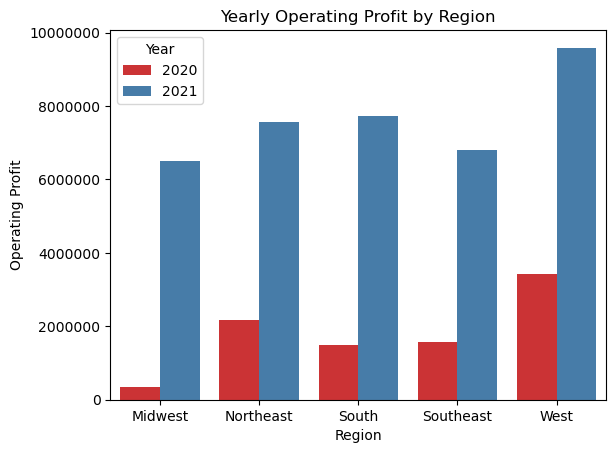

In [36]:
# Creating a bar plot to show Total Profit by Region per Year
categories = sorted(adidas['Region'].unique())
sns.barplot(data=adidas, x='Region', y='Operating Profit', hue='Year', palette = 'Set1', errorbar=None, estimator='sum',order = categories).set(title='Yearly Operating Profit by Region')
plt.ticklabel_format(style='plain', axis='y')

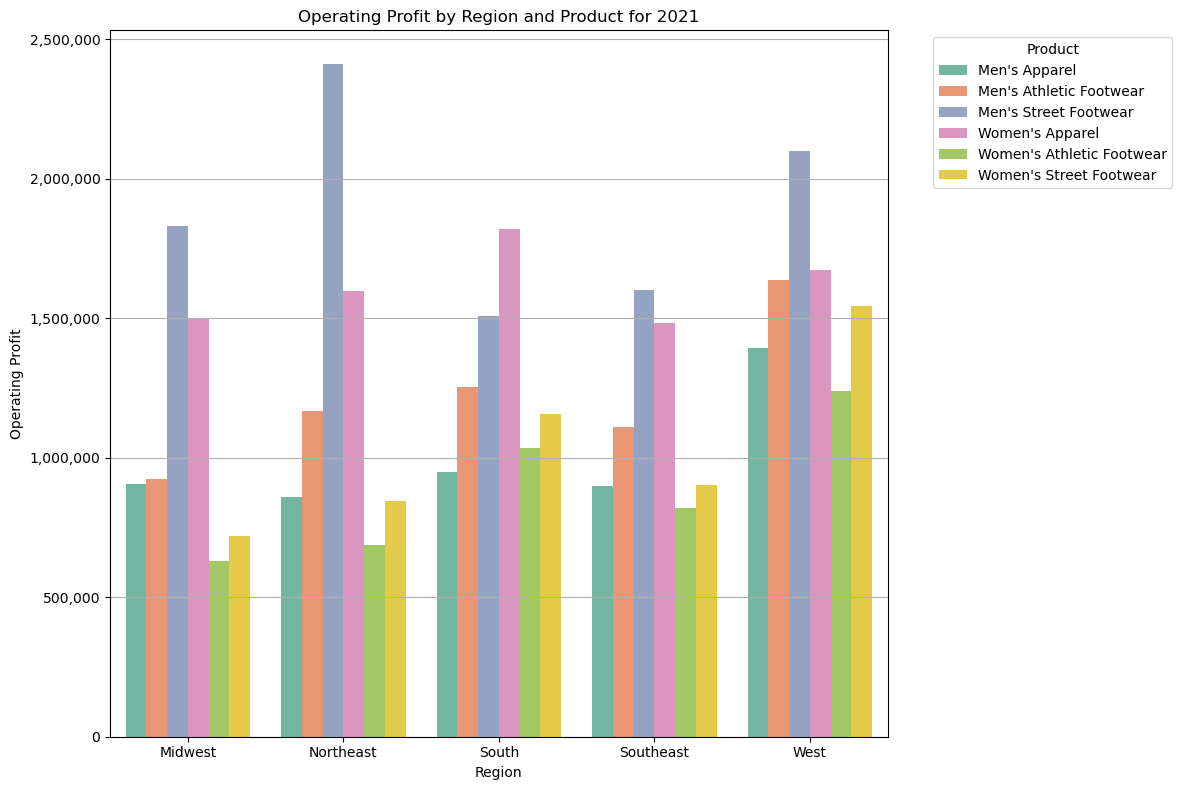

In [37]:
data_2021 = adidas[adidas['Year'] == 2021]

# Group the data by Region and Product based off of Operating Profit
grouped_data_2021 = data_2021.groupby(['Region', 'Product'])['Operating Profit'].sum().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Operating Profit', hue='Product', palette = 'Set2', data=grouped_data_2021,order = categories)

# Fix Y-Axis with Non-Truncated Values
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.grid(axis='y')
plt.title('Operating Profit by Region and Product for 2021')
plt.xlabel('Region')
plt.ylabel('Operating Profit')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

<Figure size 1000x600 with 0 Axes>

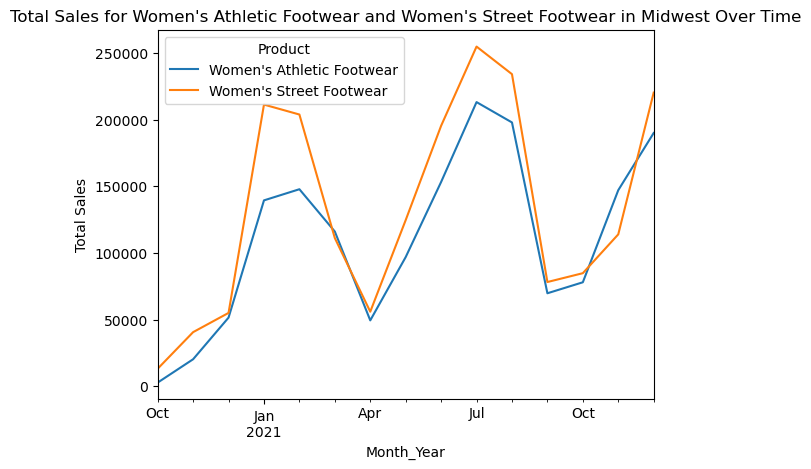

In [430]:
# Segment the data to reflect sales in the Midwest for only Women's Athletic Footwear and Women's Street Footwear
filtered_mw_w = adidas[(adidas['Region'] == 'Midwest') & (adidas['Product'].isin(["Women's Athletic Footwear", "Women's Street Footwear"]))]

mw_grouped_sales = filtered_mw_w.groupby(['Month_Year', 'Product'])['Total Sales'].sum().unstack()

# Plot the segmented group
plt.figure(figsize=(10,6))
mw_grouped_sales.plot(kind='line')

# Add labels and title
plt.title("Total Sales for Women's Athletic Footwear and Women's Street Footwear in Midwest Over Time")
plt.xlabel('Month_Year')
plt.ylabel('Total Sales')

# Show the plot
plt.show()


<h4 style="color: Blue"> 2.2 City Sales Performance </h4>

In [85]:
# Group cities by Operating Profit
city_profit = adidas.groupby('City')['Operating Profit'].sum().reset_index()

# Sort the cities by Operating Profit and display the top 10
city_top = city_profit.sort_values(by='Operating Profit', ascending = False).head(10)

print(city_top)

             City  Operating Profit
35       New York        2114664.41
10     Charleston        2024086.36
46  San Francisco        1581993.31
31          Miami        1579387.86
42       Portland        1575860.62
22        Houston        1494772.31
34    New Orleans        1424389.74
28    Los Angeles        1378158.34
6      Birmingham        1368206.39
39        Orlando        1342206.56


In [436]:
# Create segments of cities by Operating Profit, Margin, and Sales 
top_city_profit = adidas.groupby('City')['Operating Profit'].sum().reset_index().sort_values('Operating Profit', ascending = False)
top_city_margin = adidas.groupby('City')['Operating Margin'].mean().reset_index().sort_values('Operating Margin', ascending = False)
top_city_sales = adidas.groupby('City')['Total Sales'].sum().reset_index().sort_values('Total Sales', ascending = False)

# Merge all the segments into one
top_merge = top_city_profit.merge(top_city_margin, on='City').merge(top_city_sales, on='City').head(10)

print(top_merge)

            City  Operating Profit  Operating Margin  Total Sales
0       New York        2114664.41          0.396389    5676160.0
1     Charleston        2024086.36          0.444931    4904272.0
2  San Francisco        1581993.31          0.357685    4929220.0
3          Miami        1579387.86          0.429167    3874113.0
4       Portland        1575860.62          0.407722    4176777.0
5        Houston        1494772.31          0.435880    3629632.0
6    New Orleans        1424389.74          0.446852    3377031.0
7    Los Angeles        1378158.34          0.416019    3651288.0
8     Birmingham        1368206.39          0.553565    2513424.0
9        Orlando        1342206.56          0.364259    3946476.0


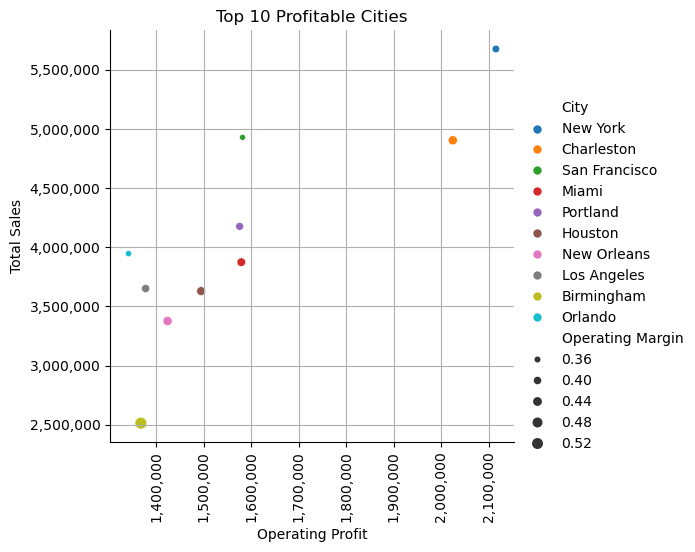

In [438]:
# Create relplot
g = sns.relplot(data=top_merge, x='Operating Profit', y='Total Sales', size='Operating Margin', hue='City', kind='scatter')

plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='both')

# Show true values of x/y axis
g.ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
g.ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
g.ax.xaxis.grid(True)
g.ax.yaxis.grid(True)
plt.title('Top 10 Profitable Cities')

plt.show()

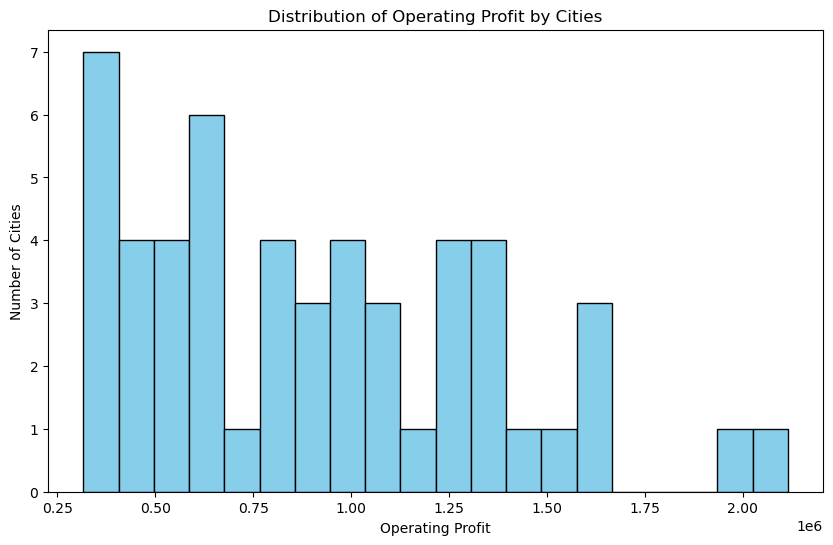

In [125]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(city_profit['Operating Profit'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Operating Profit by Cities')
plt.xlabel('Operating Profit')
plt.ylabel('Number of Cities')

plt.show()

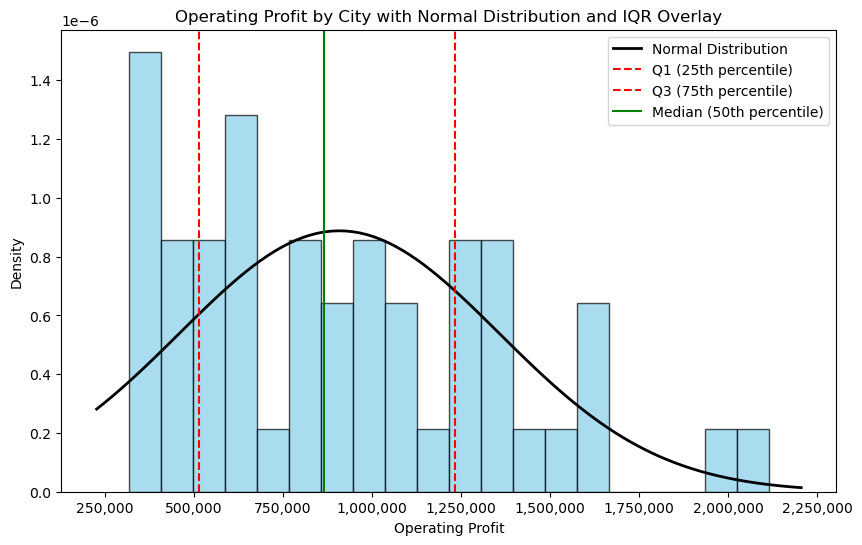

IQR: 719950.3425, Q1: 512887.32499999995, Q3: 1232837.6675, Median: 865571.3200000001


In [184]:
# Import the scipy.stats to use the normal distribution 
from scipy.stats import norm

# Reuse the histogram from above
plt.figure(figsize=(10, 6))
plt.hist(city_profit['Operating Profit'], bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7)

# Calculate mean and standard deviation for the normal distribution curve
mean_profit = city_profit['Operating Profit'].mean()
std_profit = city_profit['Operating Profit'].std()

# Plot the curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_profit, std_profit)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Calculate the IQR
Q1 = np.percentile(city_profit['Operating Profit'], 25)
Q3 = np.percentile(city_profit['Operating Profit'], 75)
IQR = Q3 - Q1

# Display lines for Q1, Q3, and Median
median_profit = np.percentile(city_profit['Operating Profit'], 50)
plt.axvline(Q1, color='r', linestyle='--', label='Q1 (25th percentile)')
plt.axvline(Q3, color='r', linestyle='--', label='Q3 (75th percentile)')
plt.axvline(median_profit, color='g', linestyle='-', label='Median (50th percentile)')

# Add labels and title
plt.title('Operating Profit by City with Normal Distribution and IQR Overlay')
plt.xlabel('Operating Profit')
plt.ylabel('Density')
plt.legend()

# Format the X-Axis to show non-truncated values
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Show the plot and display the IQR values
plt.show()
print(f'IQR: {IQR}, Q1: {Q1}, Q3: {Q3}, Median: {median_profit}')

In [186]:
# Calculate the cities that have an Operating Profit less than the 25% of all Operating Profits
city_profit_consideration = city_profit[city_profit['Operating Profit'] < 512887].sort_values('Operating Profit', ascending = False)

# Count the number of cities and convert to a string
count_consideration = str(city_profit_consideration.shape[0])


print('Number of cities below 25% of Overall Operating Profit: ' + count_consideration)
print(city_profit_consideration)



Number of cities below 25% of Overall Operating Profit: 13
            City  Operating Profit
13       Chicago         508648.61
49     St. Louis         506446.86
36        Newark         476907.22
43    Providence         463312.26
50       Wichita         460373.54
23  Indianapolis         439574.75
48   Sioux Falls         383144.46
32     Milwaukee         365126.34
4      Baltimore         359490.87
19         Fargo         352558.47
33   Minneapolis         347262.26
17    Des Moines         345626.12
38         Omaha         316805.91



<h1></h1>


<h3 style="color: Blue"> 3. Distribution Performance </h3>


<h4 style="color: Blue"> 3.1 Retailer Sales </h4>

In [356]:
# Segment data to focus on retailers
retailer_seg = data.groupby(['Retailer'])[['Operating Profit', 'Total Sales']].sum().reset_index()
retailer_margin = data.groupby(['Retailer'])['Operating Margin'].mean().reset_index()
retailer_seg = retailer_seg.merge(retailer_margin, on = 'Retailer').sort_values('Operating Profit', ascending = False)
print(retailer_seg)

        Retailer  Operating Profit  Total Sales  Operating Margin
5      West Gear       12196890.68   32409558.0          0.417856
1    Foot Locker       11317027.31   29024945.0          0.417854
3  Sports Direct       10641608.71   24616622.0          0.444892
2         Kohl's        5182260.08   13512453.0          0.419291
0         Amazon        3984432.06   10096987.0          0.417871
4        Walmart        3902748.86   10506085.0          0.406534


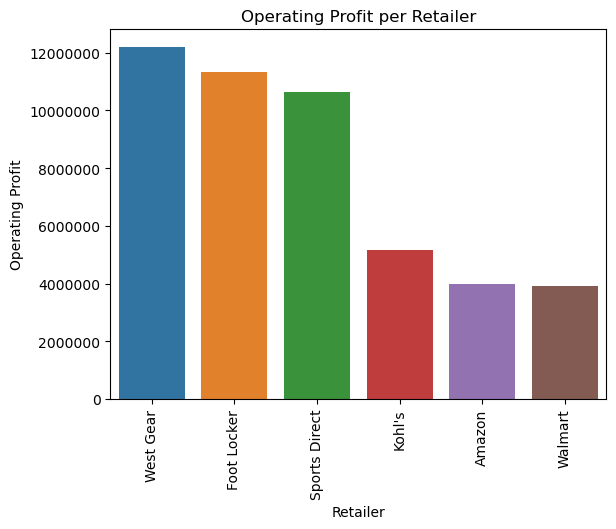

In [366]:
sns.barplot(data=retailer_seg, x='Retailer', y='Operating Profit', order=retailer_seg['Retailer'], hue = 'Retailer', errorbar=None).set(title='Operating Profit per Retailer')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')

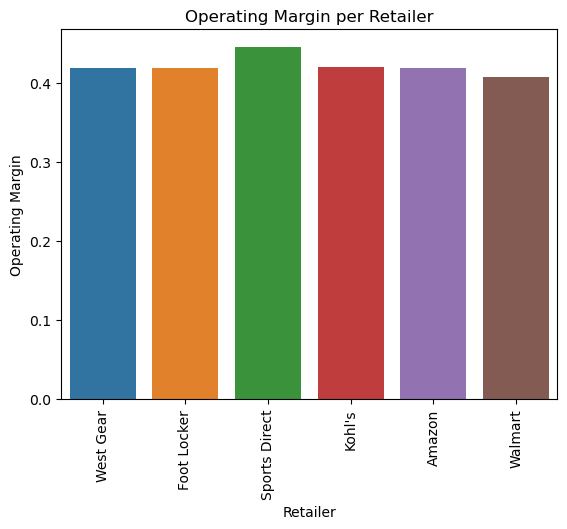

In [448]:
sns.barplot(data=retailer_seg, x='Retailer', y='Operating Margin', order=retailer_seg['Retailer'], hue = 'Retailer', errorbar=None).set(title='Operating Margin per Retailer')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')

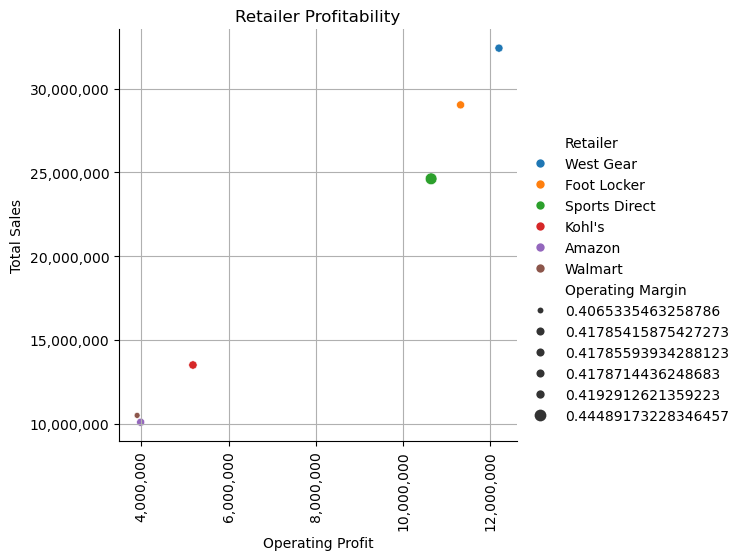

In [450]:
g = sns.relplot(data=retailer_seg, x='Operating Profit', y='Total Sales', size='Operating Margin', hue='Retailer', kind='scatter')

plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='both')

# Show true values of x/y axis
g.ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
g.ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
g.ax.xaxis.grid(True)
g.ax.yaxis.grid(True)
plt.title('Retailer Profitability')

plt.show()

<h4 style="color: Blue"> 3.2 Sales Method (Online, In-Store, Outlet) </h4>

In [416]:
sales_method = data.groupby(['Sales Method'])[['Operating Profit', 'Total Sales']].sum().reset_index()
sales_method_margin = data.groupby(['Sales Method'])['Operating Margin'].mean().reset_index()
sales_method = sales_method.merge(sales_method_margin, on = 'Sales Method').sort_values('Operating Profit', ascending = False)

print(sales_method)

  Sales Method  Operating Profit  Total Sales  Operating Margin
1       Online       19552537.72   44965657.0          0.464121
2       Outlet       14913301.23   39536618.0          0.394872
0     In-store       12759128.75   35664375.0          0.356121


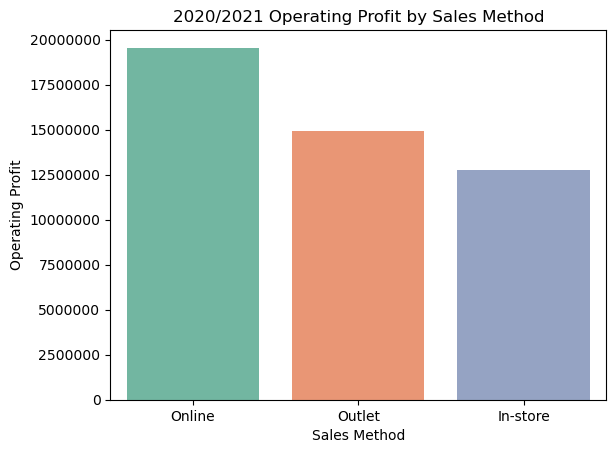

In [422]:
sns.barplot(data=sales_method, x='Sales Method', y='Operating Profit', hue = 'Sales Method', palette = 'Set2',errorbar=None).set(title='2020/2021 Operating Profit by Sales Method')
plt.ticklabel_format(style='plain', axis='y')

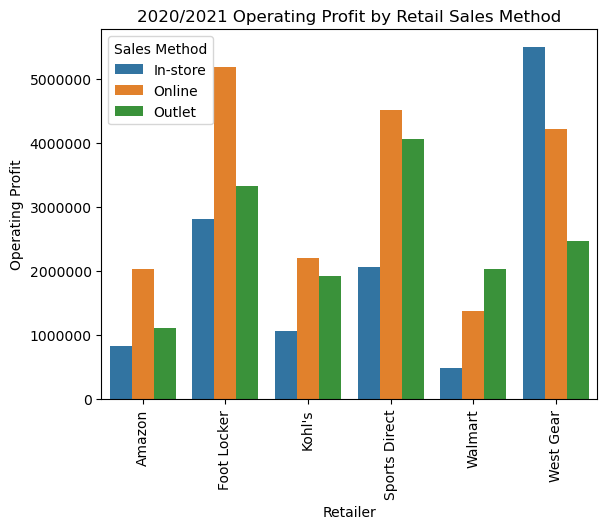

In [426]:
retailer_method = adidas.groupby(['Retailer','Sales Method'])['Operating Profit'].sum().reset_index()

sns.barplot(data=retailer_method, x='Retailer', y='Operating Profit', hue='Sales Method', errorbar=None).set(title='2020/2021 Operating Profit by Retail Sales Method')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')